This notebook talks about how to highlight and drive attention to a specific part of the data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Highlighting some points

In [4]:
pollution_data = pd.read_csv("assets/pollution-wide.csv")

pollution_data.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


Let's say we have a scatter plot of the NO2 vs the SO2 concentration of Houston like this...

In [5]:
houston_pollution = pollution_data[pollution_data['city'] == 'Houston'].copy()

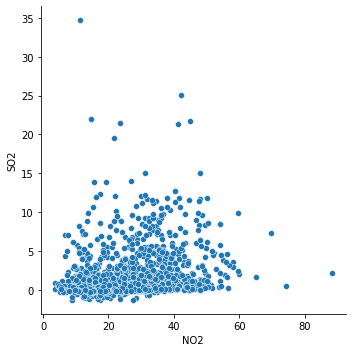

In [6]:
sns.relplot(
    data = houston_pollution,
    x = "NO2",
    y = "SO2",
    kind = "scatter"
)

We want to highlight the point at which Houston had the highest O3 with another color. We can create a hue list of 2 classes using list comprehnsion with making `"Highest O3 Day"` for the day which has the highest O3, and `"Other"` for otherwise.

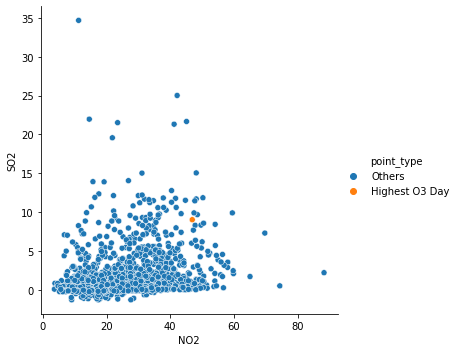

In [9]:
max_O3 = houston_pollution['O3'].max()

houston_pollution['point_type'] = ['Highest O3 Day' if O3 == max_O3 else 'Others' for O3 in houston_pollution['O3']]

sns.relplot(
    data = houston_pollution,
    x = "NO2",
    y = "SO2",
    hue = "point_type",
    kind = "scatter",
)

## Comparing groups

For example, we want to compare the pollution for the month of August with the rest of year.

* Does it have generally higher pollution?
* Does it have wider distribution of pollution?

If we are comparing a continuous measure for only 2 groups (classes), a good way is to use **overlayed kernel density plots**.

A KDE (Kernel Density Estimator) plot can be described as a continuous histogram.

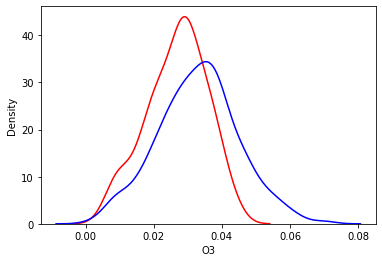

In [35]:
pollution_nov = pollution_data[pollution_data['month'] == 10].copy()

sns.kdeplot(
    data = pollution_nov[pollution_nov["city"] == "Denver"],
    x = "O3",
    color = "red"
)

sns.kdeplot(
    data = pollution_nov[pollution_nov["city"] != "Denver"],
    x = "O3",
    color = "blue"
);


If we wanted to compare multiple classes with the KDE plot...

<AxesSubplot:xlabel='O3', ylabel='Density'>

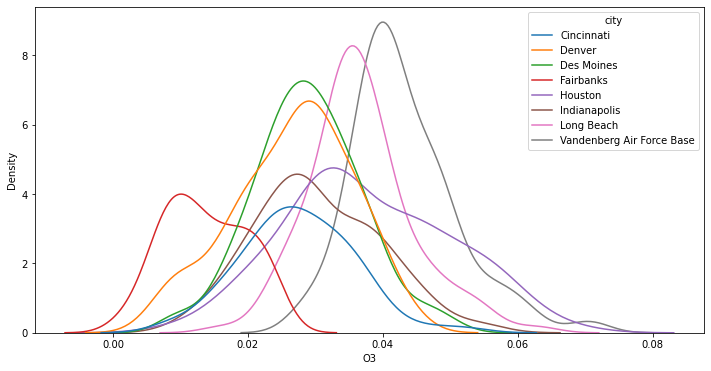

In [40]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data = pollution_nov,
    x = "O3",
    color = "red",
    hue = "city"
)

mmmm, not the best for the eye to track all these classes. A **beeswarm plot** is a better option. It's an alternative of the boxplot.

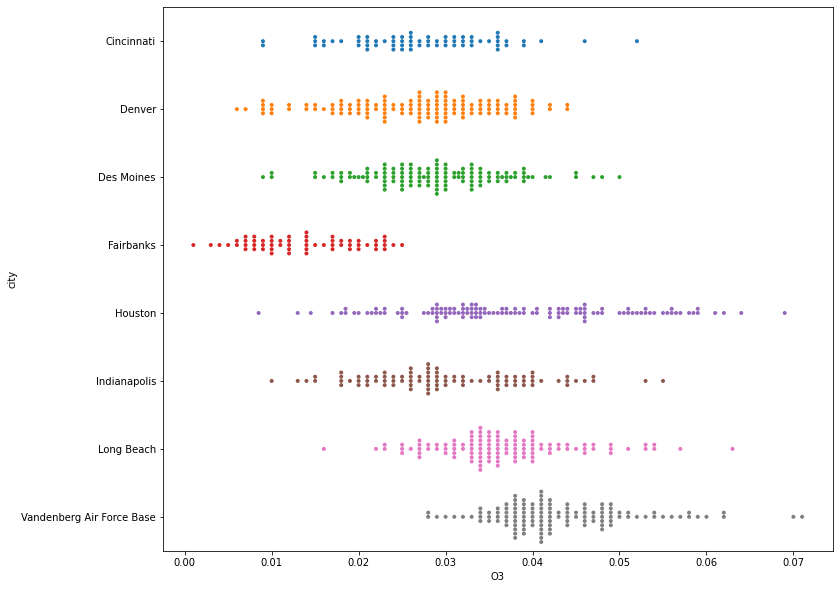

In [47]:
plt.figure(figsize = (12, 10))
sns.swarmplot(
    data = pollution_nov,
    x = "O3",
    y = "city",
    size = 4
);

## Anotations

Text(13, 33, 'Look at this outlier')

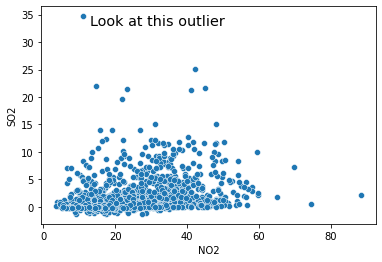

In [54]:
sns.scatterplot(
    data = houston_pollution,
    x = "NO2",
    y = "SO2"
)

plt.text(13, 33, 'Look at this outlier', fontdict = {'ha': 'left', 'size': 'x-large'})

If we want to point at a point that is in the middle of a crowded region, we can use the `annotate` function that adds a text and an arrow to that point.

Text(60, 22, 'A buried point to look at')

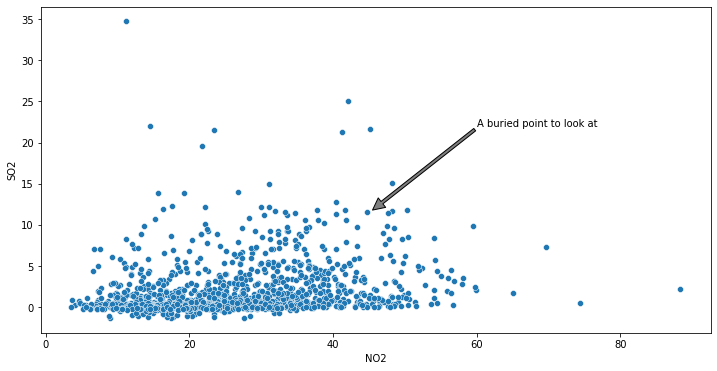

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data = houston_pollution,
    x = "NO2",
    y = "SO2"
)

plt.annotate("A buried point to look at", xy = (45.5, 11.8), xytext = (60, 22), arrowprops = {'facecolor': 'grey', 'width': 3})